In [ ]:
library(car)
library(corrplot)
library(Metrics)        # for mse
library("RSNNS")        # for rbf
library("e1071")        # for tune
setwd("C:\\Users\\zhylucky\\Downloads")
train_data = read.csv('train.csv')
test_data = read.csv('test.csv')

In [4]:
de_z<-function(x){
  mean<-mean(train_data$target)
  std<-sd(train_data$target)
  x<-as.integer(x*std+mean)
}
de_mn<-function(x){
  min<-min(train_data$target)
  max<-max(train_data$target)
  x<-as.integer(x*(max-min)+min)
}
#  convert data type
train_data$season = as.factor(train_data$season)
train_data$mnth = as.factor(train_data$mnth)
train_data$holiday = as.factor(train_data$holiday)
train_data$workingday = as.factor(train_data$workingday)
train_data$weathersit = as.factor(train_data$weathersit)
train_data$weekday = as.factor(train_data$weekday)
train_data$rising_indicator = as.factor(train_data$rising_indicator)

test_data$season = as.factor(test_data$season)
test_data$mnth = as.factor(test_data$mnth)
test_data$holiday = as.factor(test_data$holiday)
test_data$workingday = as.factor(test_data$workingday)
test_data$weathersit = as.factor(test_data$weathersit)
test_data$weekday = as.factor(test_data$weekday)
test_data$rising_indicator = as.factor(test_data$rising_indicator)

# benchmark

In [34]:
mse_benchmark = mse(test_data$cnt, test_data$target)
benchmark<-sum(pmin(test_data$cnt,test_data$target)*3 - test_data$cnt*2) 
cat('Benchmark mse is', mse_benchmark, '\n')
cat("Benchmark profit is", benchmark)

Benchmark mse is 2267579 
Benchmark profit is 1442972

# 1 Multilinear Regression

## 1.1 correlation analysis

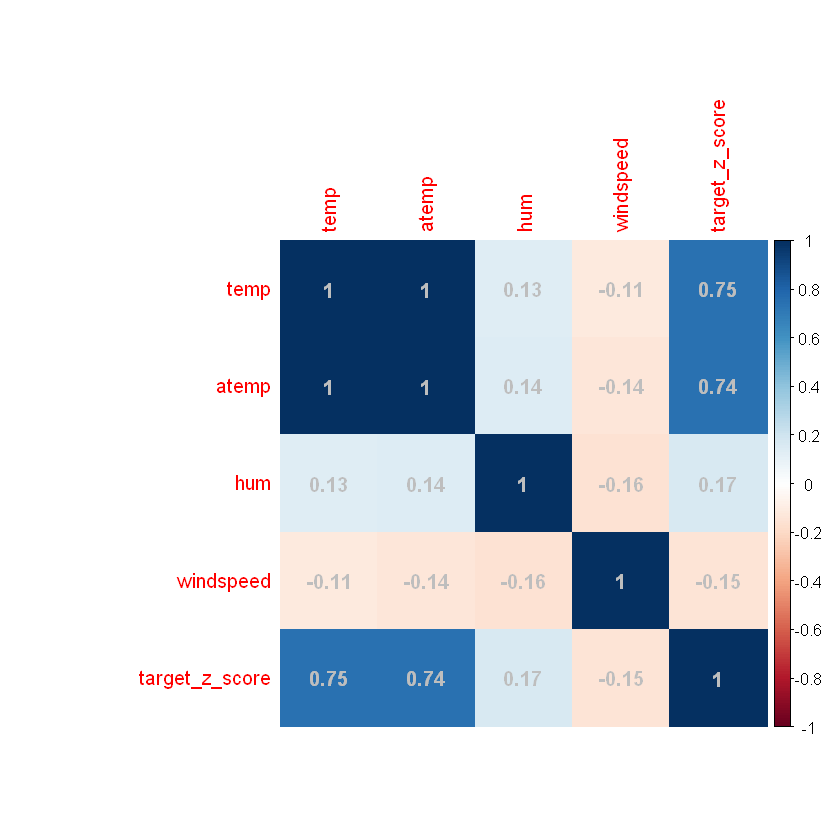

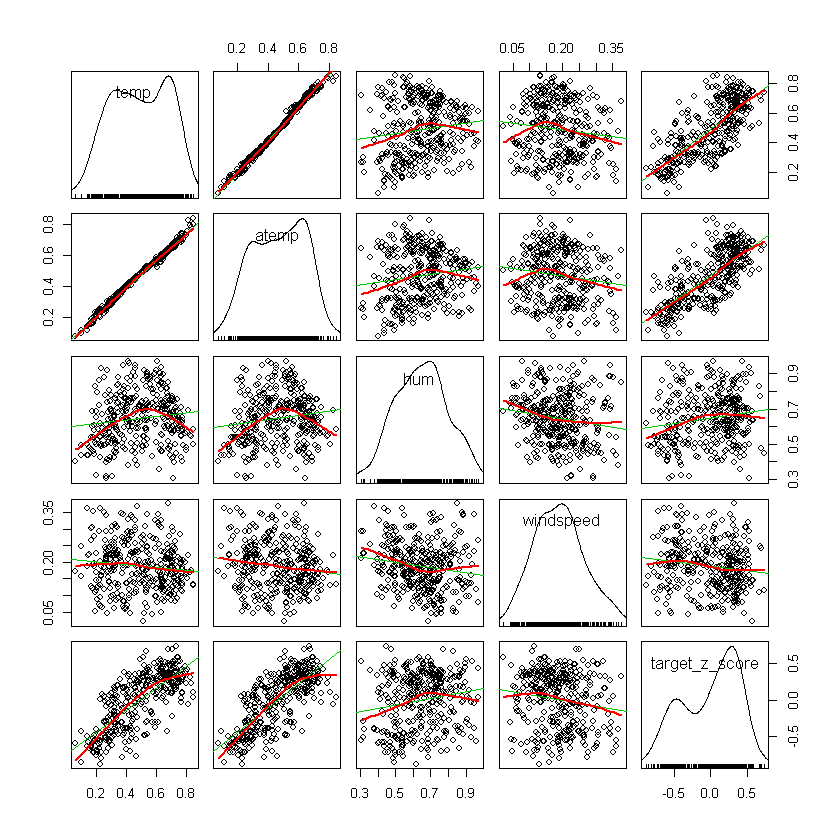

In [5]:
data_cor<-train_data[,c('temp','atemp','hum','windspeed','target_z_score')]
cor<-cor(data_cor)
corrplot(cor,method="color",addCoef.col="grey")
scatterplotMatrix(data_cor,spread=FALSE)

## 1.2 tune model

In [13]:
lm0_z<-lm(target_z_score~cnt+season+mnth+holiday+weekday+weathersit+temp+atemp+hum+windspeed+week_moving_avg_z_score+avg_growth_rate+rising_indicator,data=train_data)
summary(lm0_z)
lm0z_prediction <- de_z(predict(lm0_z, test_data, se.fit = FALSE))
lm0z_profit <- sum(pmin(lm0z_prediction,test_data$target)*3 - lm0z_prediction*2)  

lm0_mm<-lm(target_maxmin~cnt+season+mnth+holiday+weekday+weathersit+temp+atemp+hum+windspeed+week_moving_avg_maxmin+avg_growth_rate+rising_indicator,data=train_data)
summary(lm0_mm)
lm0m_prediction <- de_mn(predict(lm0_mm, test_data, se.fit = FALSE))
lm0m_profit <- sum(pmin(lm0m_prediction,test_data$target)*3 - lm0m_prediction*2)  

# delete temp
lm1_z<-lm(target_z_score~cnt+season+mnth+holiday+weekday+weathersit+atemp+hum+windspeed+week_moving_avg_z_score+avg_growth_rate+rising_indicator,data=train_data)
summary(lm1_z)
lm1z_prediction <- de_z(predict(lm1_z, test_data, se.fit = FALSE))
lm1z_profit <- sum(pmin(lm1z_prediction,test_data$target)*3 - lm1z_prediction*2)  

lm1_mm<-lm(target_maxmin~cnt+season+mnth+holiday+weekday+weathersit+atemp+hum+windspeed+week_moving_avg_maxmin+avg_growth_rate+rising_indicator,data=train_data)
summary(lm1_mm)
lm1m_prediction <- de_mn(predict(lm1_mm, test_data, se.fit = FALSE))
lm1m_profit <- sum(pmin(lm1m_prediction,test_data$target)*3 - lm1m_prediction*2)  


#delete week_moving_avg
lm2_z<-lm(target_z_score~cnt+season+mnth+holiday+weekday+weathersit+atemp+hum+windspeed+avg_growth_rate+rising_indicator,data=train_data)
summary(lm2_z)
lm2z_prediction <- de_z(predict(lm2_z, test_data, se.fit = FALSE))
lm2z_profit <- sum(pmin(lm2z_prediction,test_data$target)*3 - lm2z_prediction*2)  

lm2_mm<-lm(target_maxmin~cnt+season+mnth+holiday+weekday+weathersit+atemp+hum+windspeed+avg_growth_rate+rising_indicator,data=train_data)
summary(lm2_mm)
lm2m_prediction <- de_mn(predict(lm2_mm, test_data, se.fit = FALSE))
lm2m_profit <- sum(pmin(lm2m_prediction,test_data$target)*3 - lm2m_prediction*2)  

#delete weekday

lm3_z<-lm(target_z_score~cnt+season+mnth+holiday+weathersit+atemp+hum+windspeed+week_moving_avg_z_score+avg_growth_rate+rising_indicator,data=train_data)
summary(lm3_z)
lm3z_prediction <- de_z(predict(lm3_z, test_data, se.fit = FALSE))
lm3z_profit <- sum(pmin(lm3z_prediction,test_data$target)*3 - lm3z_prediction*2)  

lm3_mm<-lm(target_maxmin~cnt+season+mnth+holiday+weathersit+atemp+hum+windspeed+week_moving_avg_maxmin+avg_growth_rate+rising_indicator,data=train_data)
summary(lm3_mm)
lm3m_prediction <- de_mn(predict(lm3_mm, test_data, se.fit = FALSE))
lm3m_profit <- sum(pmin(lm3m_prediction,test_data$target)*3 - lm3m_prediction*2)  


#delete weatherlist
lm4_z<-lm(target_z_score~cnt+season+mnth+holiday+atemp+hum+windspeed+week_moving_avg_z_score+avg_growth_rate+rising_indicator,data=train_data)
summary(lm4_z)
lm4z_prediction <- de_z(predict(lm4_z, test_data, se.fit = FALSE))
lm4z_profit <- sum(pmin(lm4z_prediction,test_data$target)*3 - lm4z_prediction*2)  

lm4_mm<-lm(target_maxmin~cnt+season+mnth+holiday+atemp+hum+windspeed+week_moving_avg_maxmin+avg_growth_rate+rising_indicator,data=train_data)
summary(lm4_mm)
lm4m_prediction <- de_mn(predict(lm4_mm, test_data, se.fit = FALSE))
lm4m_profit <- sum(pmin(lm4m_prediction,test_data$target)*3 - lm4m_prediction*2)  

#delete windspeed
lm5_z<-lm(target_z_score~cnt+season+mnth+holiday+atemp+hum+week_moving_avg_z_score+avg_growth_rate+rising_indicator,data=train_data)
summary(lm5_z)
lm5z_prediction <- de_z(predict(lm5_z, test_data, se.fit = FALSE))
lm5z_profit <- sum(pmin(lm5z_prediction,test_data$target)*3 - lm5z_prediction*2)  

lm5_mm<-lm(target_maxmin~cnt+season+mnth+holiday+atemp+hum+week_moving_avg_maxmin+avg_growth_rate+rising_indicator,data=train_data)
summary(lm5_mm)
lm5m_prediction <- de_mn(predict(lm5_mm, test_data, se.fit = FALSE))
lm5m_profit <- sum(pmin(lm5m_prediction,test_data$target)*3 - lm5m_prediction*2)  

#delete holiday
lm6_z<-lm(target_z_score~cnt+season+mnth+hum+atemp+week_moving_avg_z_score+avg_growth_rate+rising_indicator,data=train_data)
summary(lm6_z)
lm6z_prediction <- de_z(predict(lm6_z, test_data, se.fit = FALSE))
lm6z_profit <- sum(pmin(lm6z_prediction,test_data$target)*3 - lm6z_prediction*2)  

lm6_mm<-lm(target_maxmin~cnt+season+mnth+hum+atemp+week_moving_avg_maxmin+avg_growth_rate+rising_indicator,data=train_data)
summary(lm6_mm)
lm6m_prediction <- de_mn(predict(lm6_mm, test_data, se.fit = FALSE))
lm6m_profit <- sum(pmin(lm6m_prediction,test_data$target)*3 - lm6m_prediction*2)  

#delete week_moving_avg
lm7_z<-lm(target_z_score~cnt+season+hum+mnth+atemp+holiday+avg_growth_rate+rising_indicator,data=train_data)
summary(lm7_z)
lm7z_prediction <- de_z(predict(lm7_z, test_data, se.fit = FALSE))
lm7z_profit <- sum(pmin(lm7z_prediction,test_data$target)*3 - lm7z_prediction*2)  

lm7_mm<-lm(target_maxmin~cnt+season+hum+mnth+atemp+holiday+avg_growth_rate+rising_indicator,data=train_data)
summary(lm7_mm)
lm7m_prediction <- de_mn(predict(lm7_mm, test_data, se.fit = FALSE))
lm7m_profit <- sum(pmin(lm7m_prediction,test_data$target)*3 - lm7m_prediction*2)  

#delete avg_growth_rate
lm8_z<-lm(target_z_score~cnt+season+hum+mnth+atemp+rising_indicator,data=train_data)
summary(lm8_z)
lm8z_prediction <- de_z(predict(lm8_z, test_data, se.fit = FALSE))
lm8z_profit <- sum(pmin(lm8z_prediction,test_data$target)*3 - lm8z_prediction*2)  

lm8_mm<-lm(target_maxmin~cnt+season+hum+mnth+atemp+rising_indicator,data=train_data)
summary(lm8_mm)
lm8m_prediction <- de_mn(predict(lm8_mm, test_data, se.fit = FALSE))
lm8m_profit <- sum(pmin(lm8m_prediction,test_data$target)*3 - lm8m_prediction*2)  

#delete mnth
lm9_z<-lm(target_maxmin ~ season + 
            atemp + hum  +cnt+rising_indicator,data=train_data)
summary(lm9_z)
lm9z_prediction <- de_mn(predict(lm9_z, test_data, se.fit = FALSE))
lm9z_profit <- sum(pmin(lm9z_prediction,test_data$target)*3 - lm9z_prediction*2) 

lm9_mm<-lm(target_maxmin ~ season + 
            atemp + hum  +cnt+rising_indicator,data=train_data)
summary(lm9_mm)
lm9m_prediction <- de_mn(predict(lm9_mm, test_data, se.fit = FALSE))
lm9m_profit <- sum(pmin(lm9m_prediction,test_data$target)*3 - lm9m_prediction*2)



Call:
lm(formula = target_z_score ~ cnt + season + mnth + holiday + 
    weekday + weathersit + temp + atemp + hum + windspeed + week_moving_avg_z_score + 
    avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70449 -0.10203  0.00558  0.12522  0.47016 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -6.883e-01  1.440e-01  -4.781 2.64e-06 ***
cnt                      4.130e-05  2.724e-05   1.516 0.130457    
season2                  2.735e-02  6.343e-02   0.431 0.666684    
season3                  2.079e-01  7.692e-02   2.703 0.007238 ** 
season4                  2.414e-01  7.179e-02   3.363 0.000862 ***
mnth2                    1.525e-01  5.378e-02   2.836 0.004858 ** 
mnth3                    2.316e-01  6.149e-02   3.767 0.000196 ***
mnth4                    4.795e-01  9.749e-02   4.918 1.39e-06 ***
mnth5                    7.441e-01  1.170e-01   6.361 6.79e-10


Call:
lm(formula = target_maxmin ~ cnt + season + mnth + holiday + 
    weekday + weathersit + temp + atemp + hum + windspeed + week_moving_avg_maxmin + 
    avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43802 -0.06344  0.00347  0.07786  0.29232 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.413e-02  5.812e-02   1.620 0.106293    
cnt                     2.568e-05  1.694e-05   1.516 0.130457    
season2                 1.700e-02  3.944e-02   0.431 0.666684    
season3                 1.293e-01  4.783e-02   2.703 0.007238 ** 
season4                 1.501e-01  4.464e-02   3.363 0.000862 ***
mnth2                   9.483e-02  3.344e-02   2.836 0.004858 ** 
mnth3                   1.440e-01  3.823e-02   3.767 0.000196 ***
mnth4                   2.981e-01  6.061e-02   4.918 1.39e-06 ***
mnth5                   4.626e-01  7.273e-02   6.361 6.79e-10 ***
mnth6  


Call:
lm(formula = target_z_score ~ cnt + season + mnth + holiday + 
    weekday + weathersit + atemp + hum + windspeed + week_moving_avg_z_score + 
    avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71591 -0.09888  0.00788  0.11824  0.50961 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.808e-01  1.433e-01  -5.450 9.94e-08 ***
cnt                      4.834e-05  2.756e-05   1.754 0.080352 .  
season2                  2.412e-02  6.437e-02   0.375 0.708120    
season3                  1.967e-01  7.798e-02   2.523 0.012125 *  
season4                  2.555e-01  7.272e-02   3.513 0.000505 ***
mnth2                    1.501e-01  5.458e-02   2.750 0.006293 ** 
mnth3                    2.405e-01  6.234e-02   3.859 0.000137 ***
mnth4                    4.957e-01  9.880e-02   5.017 8.61e-07 ***
mnth5                    7.857e-01  1.180e-01   6.658 1.17e-10 ***
mn


Call:
lm(formula = target_maxmin ~ cnt + season + mnth + holiday + 
    weekday + weathersit + atemp + hum + windspeed + week_moving_avg_maxmin + 
    avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44512 -0.06148  0.00490  0.07352  0.31685 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.902e-02  5.731e-02   0.855 0.393009    
cnt                     3.005e-05  1.713e-05   1.754 0.080352 .  
season2                 1.500e-02  4.002e-02   0.375 0.708120    
season3                 1.223e-01  4.849e-02   2.523 0.012125 *  
season4                 1.589e-01  4.522e-02   3.513 0.000505 ***
mnth2                   9.331e-02  3.393e-02   2.750 0.006293 ** 
mnth3                   1.496e-01  3.876e-02   3.859 0.000137 ***
mnth4                   3.082e-01  6.143e-02   5.017 8.61e-07 ***
mnth5                   4.885e-01  7.338e-02   6.658 1.17e-10 ***
mnth6         


Call:
lm(formula = target_z_score ~ cnt + season + mnth + holiday + 
    weekday + weathersit + atemp + hum + windspeed + avg_growth_rate + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71780 -0.09918  0.00860  0.11876  0.50680 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8.004e-01  9.073e-02  -8.821  < 2e-16 ***
cnt                5.168e-05  2.008e-05   2.573 0.010508 *  
season2            2.556e-02  6.375e-02   0.401 0.688685    
season3            1.987e-01  7.708e-02   2.577 0.010389 *  
season4            2.584e-01  7.083e-02   3.648 0.000308 ***
mnth2              1.508e-01  5.433e-02   2.777 0.005809 ** 
mnth3              2.419e-01  6.177e-02   3.916 0.000110 ***
mnth4              4.992e-01  9.668e-02   5.164 4.20e-07 ***
mnth5              7.930e-01  1.106e-01   7.169 5.05e-12 ***
mnth6              8.483e-01  1.175e-01   7.221 3.62e-12 ***
mnth7              6.691e-0


Call:
lm(formula = target_maxmin ~ cnt + season + mnth + holiday + 
    weekday + weathersit + atemp + hum + windspeed + avg_growth_rate + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44629 -0.06167  0.00535  0.07384  0.31510 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.731e-02  5.641e-02   0.839 0.402256    
cnt                3.213e-05  1.249e-05   2.573 0.010508 *  
season2            1.589e-02  3.964e-02   0.401 0.688685    
season3            1.235e-01  4.793e-02   2.577 0.010389 *  
season4            1.606e-01  4.404e-02   3.648 0.000308 ***
mnth2              9.378e-02  3.378e-02   2.777 0.005809 ** 
mnth3              1.504e-01  3.841e-02   3.916 0.000110 ***
mnth4              3.104e-01  6.011e-02   5.164 4.20e-07 ***
mnth5              4.930e-01  6.878e-02   7.169 5.05e-12 ***
mnth6              5.274e-01  7.304e-02   7.221 3.62e-12 ***
mnth7              4.160e-01


Call:
lm(formula = target_z_score ~ cnt + season + mnth + holiday + 
    weathersit + atemp + hum + windspeed + week_moving_avg_z_score + 
    avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67378 -0.09778  0.01088  0.12153  0.53603 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.656e-01  1.402e-01  -5.461 9.29e-08 ***
cnt                      4.671e-05  2.729e-05   1.712 0.087846 .  
season2                  1.810e-02  6.417e-02   0.282 0.778107    
season3                  1.899e-01  7.774e-02   2.443 0.015105 *  
season4                  2.458e-01  7.250e-02   3.390 0.000784 ***
mnth2                    1.504e-01  5.454e-02   2.757 0.006160 ** 
mnth3                    2.412e-01  6.228e-02   3.873 0.000130 ***
mnth4                    5.027e-01  9.826e-02   5.116 5.28e-07 ***
mnth5                    7.905e-01  1.177e-01   6.717 8.03e-11 ***
mnth6       


Call:
lm(formula = target_maxmin ~ cnt + season + mnth + holiday + 
    weathersit + atemp + hum + windspeed + week_moving_avg_maxmin + 
    avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41893 -0.06079  0.00677  0.07556  0.33328 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.303e-02  5.499e-02   0.964 0.335538    
cnt                     2.904e-05  1.697e-05   1.712 0.087846 .  
season2                 1.125e-02  3.990e-02   0.282 0.778107    
season3                 1.181e-01  4.834e-02   2.443 0.015105 *  
season4                 1.528e-01  4.508e-02   3.390 0.000784 ***
mnth2                   9.349e-02  3.391e-02   2.757 0.006160 ** 
mnth3                   1.500e-01  3.873e-02   3.873 0.000130 ***
mnth4                   3.125e-01  6.109e-02   5.116 5.28e-07 ***
mnth5                   4.915e-01  7.317e-02   6.717 8.03e-11 ***
mnth6                   


Call:
lm(formula = target_z_score ~ cnt + season + mnth + holiday + 
    atemp + hum + windspeed + week_moving_avg_z_score + avg_growth_rate + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68064 -0.09981  0.00943  0.11973  0.54269 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.738e-01  1.395e-01  -5.548 5.88e-08 ***
cnt                      5.215e-05  2.608e-05   1.999 0.046394 *  
season2                  1.339e-02  6.389e-02   0.210 0.834105    
season3                  1.797e-01  7.697e-02   2.334 0.020169 *  
season4                  2.400e-01  7.176e-02   3.345 0.000916 ***
mnth2                    1.511e-01  5.452e-02   2.772 0.005888 ** 
mnth3                    2.417e-01  6.228e-02   3.881 0.000125 ***
mnth4                    5.067e-01  9.824e-02   5.158 4.29e-07 ***
mnth5                    7.910e-01  1.177e-01   6.721 7.80e-11 ***
mnth6                    


Call:
lm(formula = target_maxmin ~ cnt + season + mnth + holiday + 
    atemp + hum + windspeed + week_moving_avg_maxmin + avg_growth_rate + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42319 -0.06206  0.00586  0.07444  0.33742 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.067e-02  5.299e-02   0.956 0.339646    
cnt                     3.242e-05  1.622e-05   1.999 0.046394 *  
season2                 8.326e-03  3.972e-02   0.210 0.834105    
season3                 1.117e-01  4.786e-02   2.334 0.020169 *  
season4                 1.492e-01  4.461e-02   3.345 0.000916 ***
mnth2                   9.396e-02  3.390e-02   2.772 0.005888 ** 
mnth3                   1.503e-01  3.872e-02   3.881 0.000125 ***
mnth4                   3.150e-01  6.108e-02   5.158 4.29e-07 ***
mnth5                   4.918e-01  7.318e-02   6.721 7.80e-11 ***
mnth6                   5.309e-01  7.


Call:
lm(formula = target_z_score ~ cnt + season + mnth + holiday + 
    atemp + hum + week_moving_avg_z_score + avg_growth_rate + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69814 -0.09823  0.00589  0.12286  0.55396 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.260e-01  1.292e-01  -5.621 3.99e-08 ***
cnt                      4.910e-05  2.586e-05   1.899  0.05847 .  
season2                  1.058e-02  6.379e-02   0.166  0.86840    
season3                  1.787e-01  7.694e-02   2.322  0.02081 *  
season4                  2.350e-01  7.153e-02   3.286  0.00112 ** 
mnth2                    1.531e-01  5.446e-02   2.812  0.00521 ** 
mnth3                    2.476e-01  6.193e-02   3.998 7.85e-05 ***
mnth4                    5.165e-01  9.762e-02   5.290 2.21e-07 ***
mnth5                    7.925e-01  1.177e-01   6.735 7.11e-11 ***
mnth6                    8.526e-01  1


Call:
lm(formula = target_maxmin ~ cnt + season + mnth + holiday + 
    atemp + hum + week_moving_avg_maxmin + avg_growth_rate + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43407 -0.06108  0.00366  0.07639  0.34442 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.510e-02  4.564e-02   1.645  0.10082    
cnt                     3.053e-05  1.608e-05   1.899  0.05847 .  
season2                 6.577e-03  3.966e-02   0.166  0.86840    
season3                 1.111e-01  4.784e-02   2.322  0.02081 *  
season4                 1.461e-01  4.447e-02   3.286  0.00112 ** 
mnth2                   9.522e-02  3.386e-02   2.812  0.00521 ** 
mnth3                   1.540e-01  3.850e-02   3.998 7.85e-05 ***
mnth4                   3.211e-01  6.070e-02   5.290 2.21e-07 ***
mnth5                   4.927e-01  7.316e-02   6.735 7.11e-11 ***
mnth6                   5.301e-01  7.716e-02   6.


Call:
lm(formula = target_z_score ~ cnt + season + mnth + hum + atemp + 
    week_moving_avg_z_score + avg_growth_rate + rising_indicator, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69499 -0.09977  0.00728  0.12202  0.55879 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.418e-01  1.284e-01  -5.779 1.71e-08 ***
cnt                      5.077e-05  2.582e-05   1.966 0.050105 .  
season2                  1.257e-02  6.378e-02   0.197 0.843876    
season3                  1.815e-01  7.691e-02   2.360 0.018845 *  
season4                  2.408e-01  7.134e-02   3.376 0.000821 ***
mnth2                    1.542e-01  5.446e-02   2.832 0.004907 ** 
mnth3                    2.512e-01  6.186e-02   4.061 6.08e-05 ***
mnth4                    5.153e-01  9.764e-02   5.277 2.35e-07 ***
mnth5                    7.941e-01  1.177e-01   6.748 6.56e-11 ***
mnth6                    8.581e-01  1.240e-01  


Call:
lm(formula = target_maxmin ~ cnt + season + mnth + hum + atemp + 
    week_moving_avg_maxmin + avg_growth_rate + rising_indicator, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43211 -0.06203  0.00453  0.07587  0.34743 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.861e-02  4.526e-02   1.516 0.130456    
cnt                     3.156e-05  1.605e-05   1.966 0.050105 .  
season2                 7.816e-03  3.966e-02   0.197 0.843876    
season3                 1.129e-01  4.782e-02   2.360 0.018845 *  
season4                 1.497e-01  4.436e-02   3.376 0.000821 ***
mnth2                   9.589e-02  3.386e-02   2.832 0.004907 ** 
mnth3                   1.562e-01  3.846e-02   4.061 6.08e-05 ***
mnth4                   3.204e-01  6.071e-02   5.277 2.35e-07 ***
mnth5                   4.937e-01  7.317e-02   6.748 6.56e-11 ***
mnth6                   5.335e-01  7.712e-02   6.918 2.31e-


Call:
lm(formula = target_z_score ~ cnt + season + hum + mnth + atemp + 
    holiday + avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70173 -0.09865  0.00531  0.12441  0.55916 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.598e-01  7.213e-02 -10.534  < 2e-16 ***
cnt                5.467e-05  1.889e-05   2.893 0.004058 ** 
season2            1.329e-02  6.313e-02   0.211 0.833323    
season3            1.826e-01  7.586e-02   2.407 0.016634 *  
season4            2.404e-01  6.943e-02   3.462 0.000605 ***
hum                1.415e-01  8.824e-02   1.604 0.109644    
mnth2              1.545e-01  5.422e-02   2.850 0.004647 ** 
mnth3              2.503e-01  6.127e-02   4.085 5.51e-05 ***
mnth4              5.230e-01  9.531e-02   5.487 8.06e-08 ***
mnth5              8.054e-01  1.102e-01   7.311 1.94e-12 ***
mnth6              8.659e-01  1.166e-01   7.429 9.06e-13 ***
mnth7 


Call:
lm(formula = target_maxmin ~ cnt + season + hum + mnth + atemp + 
    holiday + avg_growth_rate + rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43630 -0.06133  0.00330  0.07735  0.34766 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.252e-02  4.485e-02   1.617 0.106786    
cnt                3.399e-05  1.175e-05   2.893 0.004058 ** 
season2            8.266e-03  3.925e-02   0.211 0.833323    
season3            1.135e-01  4.716e-02   2.407 0.016634 *  
season4            1.494e-01  4.317e-02   3.462 0.000605 ***
hum                8.800e-02  5.486e-02   1.604 0.109644    
mnth2              9.606e-02  3.371e-02   2.850 0.004647 ** 
mnth3              1.556e-01  3.809e-02   4.085 5.51e-05 ***
mnth4              3.251e-01  5.926e-02   5.487 8.06e-08 ***
mnth5              5.008e-01  6.850e-02   7.311 1.94e-12 ***
mnth6              5.384e-01  7.247e-02   7.429 9.06e-13 ***
mnth7  


Call:
lm(formula = target_z_score ~ cnt + season + hum + mnth + atemp + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70625 -0.09400  0.00509  0.12124  0.53953 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.634e-01  7.134e-02 -10.701  < 2e-16 ***
cnt                6.100e-05  1.804e-05   3.382 0.000804 ***
season2            8.559e-03  6.283e-02   0.136 0.891719    
season3            1.755e-01  7.531e-02   2.330 0.020380 *  
season4            2.406e-01  6.916e-02   3.479 0.000568 ***
hum                1.441e-01  8.736e-02   1.650 0.099945 .  
mnth2              1.484e-01  5.379e-02   2.758 0.006130 ** 
mnth3              2.418e-01  6.015e-02   4.020 7.17e-05 ***
mnth4              5.232e-01  9.528e-02   5.491 7.86e-08 ***
mnth5              7.835e-01  1.082e-01   7.241 3.00e-12 ***
mnth6              8.455e-01  1.142e-01   7.401 1.08e-12 ***
mnth7              6.661e-01  1.25


Call:
lm(formula = target_maxmin ~ cnt + season + hum + mnth + atemp + 
    rising_indicator, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43911 -0.05844  0.00317  0.07538  0.33545 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.030e-02  4.435e-02   1.585 0.113895    
cnt                3.793e-05  1.122e-05   3.382 0.000804 ***
season2            5.322e-03  3.906e-02   0.136 0.891719    
season3            1.091e-01  4.682e-02   2.330 0.020380 *  
season4            1.496e-01  4.300e-02   3.479 0.000568 ***
hum                8.960e-02  5.432e-02   1.650 0.099945 .  
mnth2              9.224e-02  3.344e-02   2.758 0.006130 ** 
mnth3              1.504e-01  3.740e-02   4.020 7.17e-05 ***
mnth4              3.253e-01  5.924e-02   5.491 7.86e-08 ***
mnth5              4.871e-01  6.727e-02   7.241 3.00e-12 ***
mnth6              5.257e-01  7.103e-02   7.401 1.08e-12 ***
mnth7              4.141e-01  7.787


Call:
lm(formula = target_maxmin ~ season + atemp + hum + cnt + rising_indicator, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46823 -0.06520  0.01283  0.07804  0.33880 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.000e-02  4.024e-02  -0.745 0.456567    
season2            1.465e-01  2.800e-02   5.234 2.87e-07 ***
season3            1.618e-01  3.475e-02   4.656 4.59e-06 ***
season4            1.468e-01  2.739e-02   5.361 1.51e-07 ***
atemp              2.983e-01  8.816e-02   3.384 0.000795 ***
hum                1.070e-01  5.314e-02   2.014 0.044784 *  
cnt                7.535e-05  1.073e-05   7.022 1.15e-11 ***
rising_indicator1 -2.553e-02  1.487e-02  -1.716 0.087046 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1285 on 350 degrees of freedom
Multiple R-squared:  0.7097,	Adjusted R-squared:  0.7039 
F-statistic: 122.2 on 7 and 350 DF,  p-va


Call:
lm(formula = target_maxmin ~ season + atemp + hum + cnt + rising_indicator, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46823 -0.06520  0.01283  0.07804  0.33880 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.000e-02  4.024e-02  -0.745 0.456567    
season2            1.465e-01  2.800e-02   5.234 2.87e-07 ***
season3            1.618e-01  3.475e-02   4.656 4.59e-06 ***
season4            1.468e-01  2.739e-02   5.361 1.51e-07 ***
atemp              2.983e-01  8.816e-02   3.384 0.000795 ***
hum                1.070e-01  5.314e-02   2.014 0.044784 *  
cnt                7.535e-05  1.073e-05   7.022 1.15e-11 ***
rising_indicator1 -2.553e-02  1.487e-02  -1.716 0.087046 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1285 on 350 degrees of freedom
Multiple R-squared:  0.7097,	Adjusted R-squared:  0.7039 
F-statistic: 122.2 on 7 and 350 DF,  p-va

In [32]:
mse_mlr = mse(lm9m_prediction, test_data$target) 
cat('Mse using Multilinear Regression model is', mse_mlr, '\n')
cat('Profits using Multilinear Regression model is', lm9m_profit)

Mse using Multilinear Regression model is 3044160 
Profits using Multilinear Regression model is 1440207

## 1.3 test

 lag Autocorrelation D-W Statistic p-value
   1       0.3710894      1.254523       0
 Alternative hypothesis: rho != 0

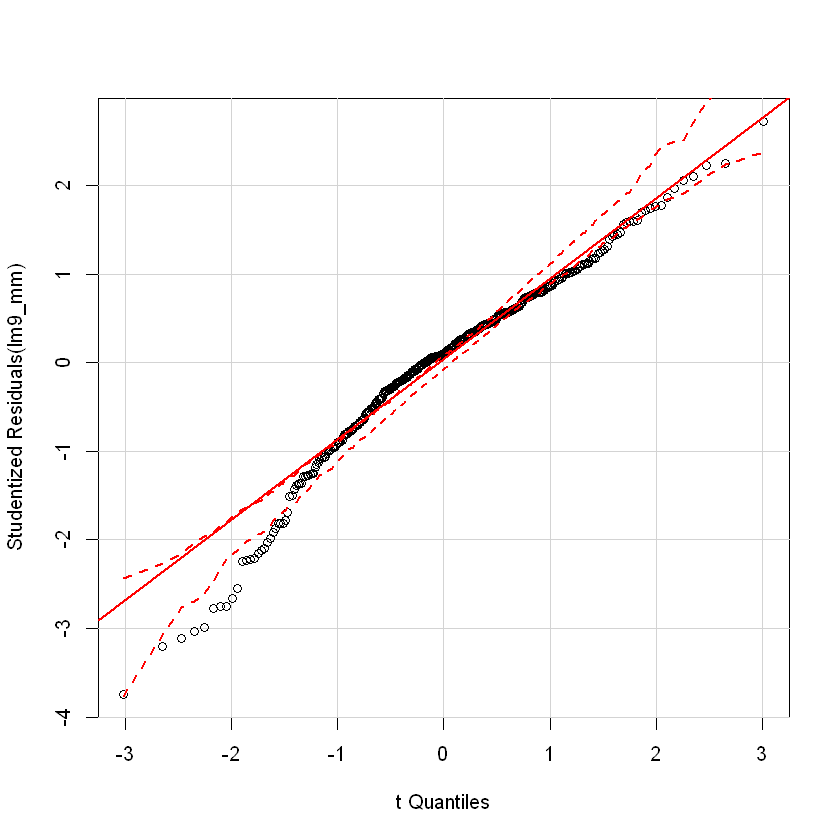

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 7.170834    Df = 1     p = 0.007409831 

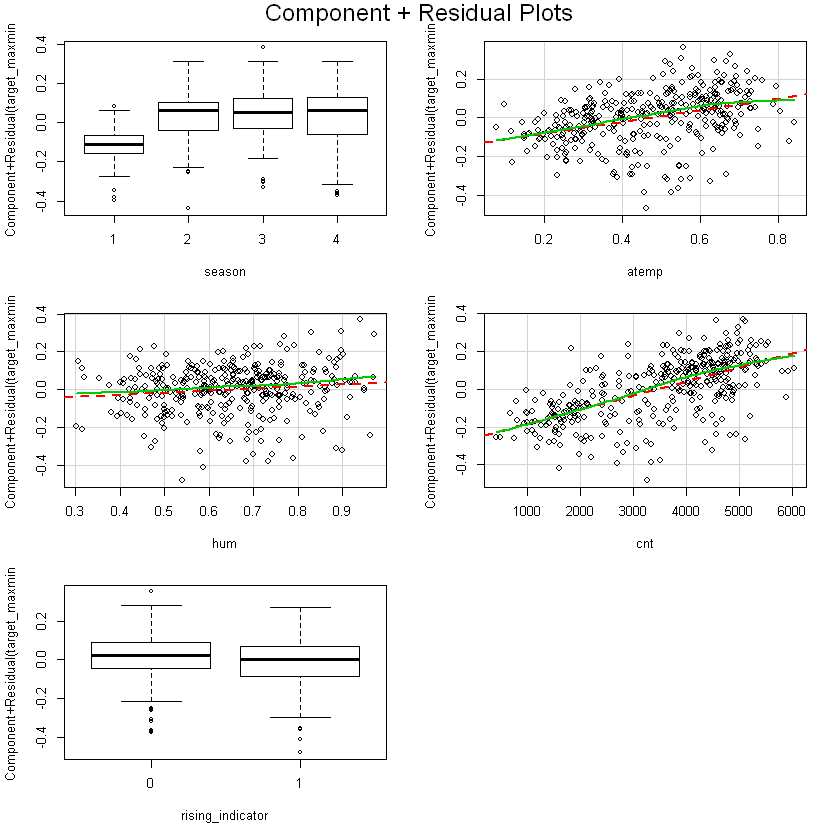


Suggested power transformation:  0.6069018 

,GVIF,Df,GVIF^(1/(2*Df))
season,2.204887,1.732051,1.140857
atemp,2.183150,1.000000,1.477549
hum,1.118108,1.000000,1.057406
cnt,2.101329,1.000000,1.449596
rising_indicator,1.092298,1.000000,1.045131


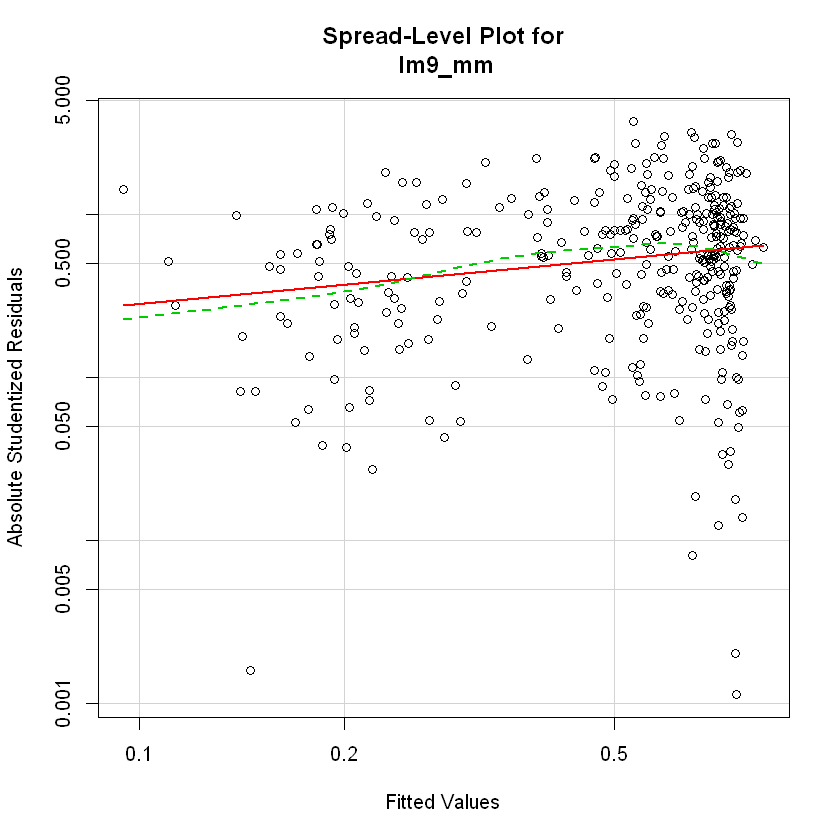

In [14]:
qqPlot(lm9_mm)           # normal distribution test
durbinWatsonTest(lm9_mm) # p-value = 0, that means that (Ha) is that residuals are autocorrelated.
crPlots(lm9_mm)          # component + residual plots
ncvTest(lm9_mm)          # p = 0.0006966067, that means (Ha) Non-constant Variance. The error variance changes with the level of the response (fitted values)
spreadLevelPlot(lm9_mm)
# multilinear test
sqrt(vif(lm9_mm))   # all vif <2, no multilinear 

## 1.4 Summary
### 1.4.1 Name: Multilinear Regression
### 1.4.2 Input variables
season,	mnth,	holiday	weekday	weathersit,	atemp, hum,	windspeed,	week_moving_avg_z_score, avg_growth_rate, rising_indicator
### 1.4.3 target variable
cnt
### 1.4.4 step for tuning the model
According to 1.1 correlation analysis, we find target ‘cnt’ has linear relationship with other variables. ‘temp’ and ‘atemp’ have strong correlation, so remove either one. In this experiment, we remove ‘temp’. Then we input other variables except ‘temp’. After that, we use Backward elimination method to select all the variables whose p-value < 0.05. Final the variables are shown above. 

After building the model, we use residual test to test assumption. First, we check out the residual whether is normally distributed. From Figure above, the residual is normal distribution. Second, we use VIF to test whether exist collinearity and it doesn’t exist collinearity. Third, we check whether is autocorrelation. According to Durbin-Watson test, we find residuals exist strong auto correlation. As a result, it doesn’t satisfy model assumption. Don’t consider this model later.
### 1.4.5 final result
#Mse using Multilinear Regression model is 3044160.
#Profits using Multilinear Regression model is 1440207.


# 2 General Linear Regression (Poisson)

## 2.1 tune model

In [35]:
glm0<- glm(target~cnt+season+mnth+holiday+weekday+weathersit+
              temp+atemp+hum+windspeed+week_moving_avg+
              avg_growth_rate+rising_indicator,
            family = poisson(), data = train_data)
Anova(glm0)
summary(glm0)
glm0_prediction <- as.integer(exp(predict(glm0, test_data, se.fit = FALSE)))
glm0_profit <- sum(pmin(glm0_prediction,test_data$target)*3 - glm0_prediction*2) 

#delete windspeed
glm1<- glm(target~cnt+season+mnth+holiday+weekday+weathersit+
             temp+atemp+hum+windspeed+
             avg_growth_rate+rising_indicator,
           family = poisson(), data = train_data)
Anova(glm1)
summary(glm1)
glm1_prediction <- as.integer(exp(predict(glm1, test_data, se.fit = FALSE)))
glm1_profit <- sum(pmin(glm1_prediction,test_data$target)*3 - glm1_prediction*2)

#delete weathersit
glm2<- glm(target~cnt+season+mnth+holiday+weekday+
             temp+atemp+hum+windspeed+
             avg_growth_rate+rising_indicator,
           family = poisson(), data = train_data)
Anova(glm2)
summary(glm2)
glm2_prediction <- as.integer(exp(predict(glm2, test_data, se.fit = FALSE)))
glm2_profit <- sum(pmin(glm2_prediction,test_data$target)*3 - glm2_prediction*2)


#delete mnth
glm3<- glm(target~cnt+season+holiday+weekday+
             temp+atemp+hum+windspeed+
             avg_growth_rate+rising_indicator,
           family = poisson(), data = train_data)
Anova(glm3)
summary(glm3)
glm3_prediction <- as.integer(exp(predict(glm3, test_data, se.fit = FALSE)))
glm3_profit <- sum(pmin(glm3_prediction,test_data$target)*3 - glm3_prediction*2)

#delete holiday
glm4<- glm(target~cnt+season+weekday+
             temp+atemp+hum+windspeed+
             avg_growth_rate+rising_indicator,
           family = poisson(), data = train_data)
Anova(glm4)
summary(glm4)
glm4_prediction <- as.integer(exp(predict(glm4, test_data, se.fit = FALSE)))
glm4_profit <- sum(pmin(glm4_prediction,test_data$target)*3 - glm4_prediction*2)



#delete temp
glm5 <- glm(target ~ season +weekday + 
              atemp + hum + windspeed +cnt+rising_indicator,
            family = poisson(), data = train_data)
Anova(glm5)
summary(glm5)
glm5_prediction <- as.integer(exp(predict(glm5, test_data, se.fit = FALSE)))
glm5_profit <- sum(pmin(glm5_prediction,test_data$target)*3 - glm5_prediction*2)    


#delete weekday
glm6 <- glm(target ~ season  + 
              atemp + hum + windspeed +cnt+rising_indicator,
            family = poisson(), data = train_data)
Anova(glm6)
summary(glm6)
glm6_prediction <- as.integer(exp(predict(glm6, test_data, se.fit = FALSE)))
glm6_profit <- sum(pmin(glm6_prediction,test_data$target)*3 - glm6_prediction*2)  

#delete atemp
glm7 <- glm(target ~ season  + 
               hum + windspeed +cnt+rising_indicator,
            family = poisson(), data = train_data)
Anova(glm7)
summary(glm7)
glm7_prediction <- as.integer(exp(predict(glm7, test_data, se.fit = FALSE)))
glm7_profit <- sum(pmin(glm7_prediction,test_data$target)*3 - glm7_prediction*2)  

,LR Chisq,Df,Pr(>Chisq)
cnt,480.323958,1,1.816566e-106
season,755.868442,1,2.125189e-166
mnth,5.871165,1,1.539086e-02
holiday,534.005480,1,3.797879e-118
weekday,120.678609,1,4.493356e-28
weathersit,26.217921,1,3.049790e-07
temp,906.825425,1,3.221526e-199
atemp,538.067400,1,4.964403e-119
hum,426.659166,1,8.670154e-95
windspeed,178.896586,1,8.440036e-41



Call:
glm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + temp + atemp + hum + windspeed + week_moving_avg + 
    avg_growth_rate + rising_indicator, family = poisson(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-42.100   -7.107    0.579    8.100   30.001  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.838e+00  7.761e-03 881.117  < 2e-16 ***
cnt               5.140e-05  2.347e-06  21.905  < 2e-16 ***
season            5.179e-02  1.906e-03  27.176  < 2e-16 ***
mnth              1.484e-03  6.118e-04   2.426   0.0153 *  
holiday          -1.358e-01  5.997e-03 -22.643  < 2e-16 ***
weekday           5.089e-03  4.632e-04  10.986  < 2e-16 ***
weathersit        1.203e-02  2.350e-03   5.122 3.02e-07 ***
temp              1.757e+00  5.833e-02  30.128  < 2e-16 ***
atemp            -1.538e+00  6.636e-02 -23.181  < 2e-16 ***
hum               1.910e-01  9.250e-03  20.649  < 

,LR Chisq,Df,Pr(>Chisq)
cnt,13957.22999,1,0.000000e+00
season,1359.92635,1,1.073022e-297
mnth,11.02971,1,8.966306e-04
holiday,393.88401,1,1.181230e-87
weekday,115.52102,1,6.051425e-27
weathersit,207.76346,1,4.225005e-47
temp,771.97551,1,6.686896e-170
atemp,282.62219,1,2.014579e-63
hum,732.95948,1,2.035542e-161
windspeed,299.77754,1,3.683311e-67



Call:
glm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + temp + atemp + hum + windspeed + avg_growth_rate + 
    rising_indicator, family = poisson(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-43.705   -8.182    1.228    8.886   27.629  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.829e+00  7.758e-03 880.255  < 2e-16 ***
cnt               1.632e-04  1.385e-06 117.871  < 2e-16 ***
season            6.857e-02  1.889e-03  36.297  < 2e-16 ***
mnth              2.032e-03  6.109e-04   3.327 0.000879 ***
holiday          -1.168e-01  5.988e-03 -19.501  < 2e-16 ***
weekday           4.970e-03  4.624e-04  10.749  < 2e-16 ***
weathersit        3.346e-02  2.319e-03  14.428  < 2e-16 ***
temp              1.615e+00  5.808e-02  27.798  < 2e-16 ***
atemp            -1.104e+00  6.570e-02 -16.805  < 2e-16 ***
hum               2.479e-01  9.163e-03  27.056  < 2e-16 ***
windspee

,LR Chisq,Df,Pr(>Chisq)
cnt,13917.333472,1,0.000000e+00
season,1480.083619,1,9.881313e-324
mnth,7.140159,1,7.537647e-03
holiday,391.884474,1,3.218307e-87
weekday,152.980424,1,3.868578e-35
temp,912.120032,1,2.275573e-200
atemp,363.572854,1,4.694786e-81
hum,2192.285567,1,0.000000e+00
windspeed,439.267852,1,1.562392e-97
avg_growth_rate,137.013607,1,1.197616e-31



Call:
glm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    temp + atemp + hum + windspeed + avg_growth_rate + rising_indicator, 
    family = poisson(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-43.722   -7.997    1.177    8.848   28.385  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.829e+00  7.763e-03 879.669  < 2e-16 ***
cnt               1.588e-04  1.351e-06 117.512  < 2e-16 ***
season            7.111e-02  1.880e-03  37.829  < 2e-16 ***
mnth              1.632e-03  6.098e-04   2.676  0.00746 ** 
holiday          -1.165e-01  5.987e-03 -19.452  < 2e-16 ***
weekday           5.681e-03  4.593e-04  12.368  < 2e-16 ***
temp              1.737e+00  5.747e-02  30.221  < 2e-16 ***
atemp            -1.240e+00  6.504e-02 -19.061  < 2e-16 ***
hum               3.318e-01  7.085e-03  46.825  < 2e-16 ***
windspeed         2.859e-01  1.362e-02  20.989  < 2e-16 ***
avg_growth_rate  -1.1

,LR Chisq,Df,Pr(>Chisq)
cnt,13996.0630,1,0.000000e+00
season,4867.7768,1,0.000000e+00
holiday,389.0668,1,1.321396e-86
weekday,153.2944,1,3.303185e-35
temp,904.9973,1,8.043846e-199
atemp,358.3557,1,6.421413e-80
hum,2210.6887,1,0.000000e+00
windspeed,434.9641,1,1.350445e-96
avg_growth_rate,149.2070,1,2.583987e-34
rising_indicator,478.9664,1,3.586333e-106



Call:
glm(formula = target ~ cnt + season + holiday + weekday + temp + 
    atemp + hum + windspeed + avg_growth_rate + rising_indicator, 
    family = poisson(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-43.811   -7.992    1.184    8.922   28.524  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.829e+00  7.760e-03  880.06   <2e-16 ***
cnt               1.590e-04  1.349e-06  117.81   <2e-16 ***
season            7.524e-02  1.077e-03   69.84   <2e-16 ***
holiday          -1.160e-01  5.985e-03  -19.38   <2e-16 ***
weekday           5.687e-03  4.593e-04   12.38   <2e-16 ***
temp              1.724e+00  5.725e-02   30.11   <2e-16 ***
atemp            -1.228e+00  6.487e-02  -18.93   <2e-16 ***
hum               3.327e-01  7.076e-03   47.02   <2e-16 ***
windspeed         2.842e-01  1.361e-02   20.89   <2e-16 ***
avg_growth_rate  -1.191e-01  9.823e-03  -12.13   <2e-16 ***
rising_indicator -4.356e-02 

,LR Chisq,Df,Pr(>Chisq)
cnt,14040.9255,1,0.000000e+00
season,4843.1105,1,0.000000e+00
weekday,199.4645,1,2.733320e-45
temp,806.7887,1,1.803389e-177
atemp,294.3613,1,5.575576e-66
hum,2309.1261,1,0.000000e+00
windspeed,490.5352,1,1.089840e-108
avg_growth_rate,112.9171,1,2.249867e-26
rising_indicator,436.8741,1,5.185359e-97



Call:
glm(formula = target ~ cnt + season + weekday + temp + atemp + 
    hum + windspeed + avg_growth_rate + rising_indicator, family = poisson(), 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-43.773   -7.985    1.140    9.084   29.093  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.808e+00  7.693e-03  884.99   <2e-16 ***
cnt               1.591e-04  1.348e-06  117.99   <2e-16 ***
season            7.501e-02  1.077e-03   69.66   <2e-16 ***
weekday           6.466e-03  4.578e-04   14.12   <2e-16 ***
temp              1.622e+00  5.706e-02   28.42   <2e-16 ***
atemp            -1.109e+00  6.463e-02  -17.15   <2e-16 ***
hum               3.399e-01  7.073e-03   48.06   <2e-16 ***
windspeed         3.011e-01  1.357e-02   22.18   <2e-16 ***
avg_growth_rate  -1.032e-01  9.773e-03  -10.56   <2e-16 ***
rising_indicator -4.157e-02  1.988e-03  -20.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**'

,LR Chisq,Df,Pr(>Chisq)
season,4815.8577,1,0.000000e+00
weekday,277.1390,1,3.155444e-62
atemp,6610.6319,1,0.000000e+00
hum,2304.1162,1,0.000000e+00
windspeed,762.3547,1,8.261974e-168
cnt,14933.1188,1,0.000000e+00
rising_indicator,525.1918,1,3.140523e-116



Call:
glm(formula = target ~ season + weekday + atemp + hum + windspeed + 
    cnt + rising_indicator, family = poisson(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-44.884   -7.591    1.407    9.210   34.912  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.723e+00  7.186e-03  935.49   <2e-16 ***
season            7.385e-02  1.062e-03   69.53   <2e-16 ***
weekday           7.572e-03  4.548e-04   16.65   <2e-16 ***
atemp             7.326e-01  8.940e-03   81.95   <2e-16 ***
hum               3.400e-01  7.082e-03   48.00   <2e-16 ***
windspeed         3.694e-01  1.336e-02   27.65   <2e-16 ***
cnt               1.592e-04  1.312e-06  121.35   <2e-16 ***
rising_indicator -4.534e-02  1.977e-03  -22.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 201638  on 357  degrees of freedom
Residual 

,LR Chisq,Df,Pr(>Chisq)
season,4804.3125,1,0.000000e+00
atemp,6458.2041,1,0.000000e+00
hum,2258.6548,1,0.000000e+00
windspeed,841.7550,1,4.508762e-185
cnt,15101.6763,1,0.000000e+00
rising_indicator,446.9091,1,3.394530e-99



Call:
glm(formula = target ~ season + atemp + hum + windspeed + cnt + 
    rising_indicator, family = poisson(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-45.477   -7.714    1.148    9.093   35.708  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.743e+00  7.080e-03  952.33   <2e-16 ***
season            7.379e-02  1.063e-03   69.44   <2e-16 ***
atemp             7.237e-01  8.940e-03   80.95   <2e-16 ***
hum               3.367e-01  7.084e-03   47.52   <2e-16 ***
windspeed         3.870e-01  1.332e-02   29.06   <2e-16 ***
cnt               1.603e-04  1.313e-06  122.08   <2e-16 ***
rising_indicator -4.152e-02  1.963e-03  -21.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 201638  on 357  degrees of freedom
Residual deviance:  64905  on 351  degrees of freedom
AIC: 68462

Number of Fis

,LR Chisq,Df,Pr(>Chisq)
season,2892.752,1,0.000000e+00
hum,3796.644,1,0.000000e+00
windspeed,1142.691,1,1.739369e-250
cnt,78283.229,1,0.000000e+00
rising_indicator,2026.345,1,0.000000e+00



Call:
glm(formula = target ~ season + hum + windspeed + cnt + rising_indicator, 
    family = poisson(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-45.414   -9.100    1.027    8.572   44.556  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.808e+00  6.989e-03  974.06   <2e-16 ***
season            5.539e-02  1.027e-03   53.95   <2e-16 ***
hum               4.301e-01  6.981e-03   61.62   <2e-16 ***
windspeed         4.464e-01  1.318e-02   33.86   <2e-16 ***
cnt               2.398e-04  8.692e-07  275.94   <2e-16 ***
rising_indicator -8.485e-02  1.883e-03  -45.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 201638  on 357  degrees of freedom
Residual deviance:  71363  on 352  degrees of freedom
AIC: 74918

Number of Fisher Scoring iterations: 4


In [36]:
mse_glm = mse(glm7_profit, test_data$target) 
cat('Mse using Multilinear Regression model is', mse_glm, '\n')
cat('Profits using Multilinear Regression model is', glm7_profit)

Mse using Multilinear Regression model is 1.627513e+12 
Profits using Multilinear Regression model is 1281339

## 2.2 test

In [37]:
require(qcc)
qcc.overdispersion.test(test_data$cnt, type = "poisson")

Loading required package: qcc
Warning message:
"package 'qcc' was built under R version 3.4.4"Package 'qcc' version 2.7
Type 'citation("qcc")' for citing this R package in publications.


,Obs.Var/Theor.Var,Statistic,p-value
poisson data,567.994,207317.8,0


## 2.3 Summary
### 2.3.1 Name
General Linear Regression (Poisson)
### 2.3.2 Input variables
season, hum, windspeed, cnt+rising_indicator
### 2.3.3 Output variables
cnt
### 2.3.4 Steps for tuning the model
According to 1.1 correlation analysis, we find variables ‘temp’ and ‘atemp’ have strong correlation, so remove either one. In this experiment, we remove ‘temp’. Then we input other variables except ‘temp’. After that, we use Backward elimination method to select all the variables whose p-value < 0.05. Final the variables are shown above.

After building the model, we use overdispersion test to test assumption. We find it is overdispersed, so do not consider it later.
### 2.3.5 result
#Mse using Multilinear Regression model is 1.627513e+12. 
#Profits using Multilinear Regression model is 1281339.

# 3 RBF

In [38]:
set.seed(1)
sub<-sample(1:nrow(train_data),round(nrow(train_data)*2/3))
length(sub)
data_train<-train_data[sub,]
data_val<-train_data[-sub,]

[1] 239

## 3.1 Tune model

### 3.1.1 select input variables

In [41]:
# input all variables
input1 <-c("holiday","workingday","temp","atemp","hum", "windspeed" ,"rising_indicator","avg_growth_rate",
           "season_1","season_2","season_3","season_4",
           "mnth_1","mnth_2","mnth_3","mnth_4","mnth_5","mnth_6","mnth_7","mnth_8","mnth_9","mnth_10","mnth_11","mnth_12",
           "weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf1 <- rbf(as.matrix(data_train[,input1]), as.matrix(data_train$target_maxmin))
rbf1_prediction <- de_mn(predict(rbf1, data_val[,input1]))
rbf1_profit <- sum(pmin(rbf1_prediction,data_val$target)*3 - rbf1_prediction*2)


#delete holiday
input2 <-c("workingday","temp","atemp","hum", "windspeed" ,"rising_indicator","avg_growth_rate",
           "season_1","season_2","season_3","season_4",
           "mnth_1","mnth_2","mnth_3","mnth_4","mnth_5","mnth_6","mnth_7","mnth_8","mnth_9","mnth_10","mnth_11","mnth_12",
           "weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf2 <- rbf(as.matrix(data_train[,input2]), as.matrix(data_train$target_maxmin))
rbf2_prediction <- de_mn(predict(rbf2, data_val[,input2]))
rbf2_profit <- sum(pmin(rbf2_prediction,data_val$target)*3 - rbf2_prediction*2)


#delete workingday
input3 <-c("temp","atemp","hum", "windspeed" ,"rising_indicator","avg_growth_rate",
           "season_1","season_2","season_3","season_4",
           "mnth_1","mnth_2","mnth_3","mnth_4","mnth_5","mnth_6","mnth_7","mnth_8","mnth_9","mnth_10","mnth_11","mnth_12",
           "weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf3 <- rbf(as.matrix(data_train[,input3]), as.matrix(data_train$target_maxmin))
rbf3_prediction <- de_mn(predict(rbf3, data_val[,input3]))
rbf3_profit <- sum(pmin(rbf3_prediction,data_val$target)*3 - rbf3_prediction*2)

#delete hum
input4 <-c("temp","atemp", "windspeed" ,"rising_indicator","avg_growth_rate",
           "season_1","season_2","season_3","season_4",
           "mnth_1","mnth_2","mnth_3","mnth_4","mnth_5","mnth_6","mnth_7","mnth_8","mnth_9","mnth_10","mnth_11","mnth_12",
           "weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf4 <- rbf(as.matrix(data_train[,input4]), as.matrix(data_train$target_maxmin))
rbf4_prediction <- de_mn(predict(rbf4, data_val[,input4]))
rbf4_profit <- sum(pmin(rbf4_prediction,data_val$target)*3 - rbf4_prediction*2)

#delete mnth
input5 <-c("temp","atemp","windspeed" ,"rising_indicator","avg_growth_rate",
           "season_1","season_2","season_3","season_4",

           "weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf5 <- rbf(as.matrix(data_train[,input5]), as.matrix(data_train$target_maxmin))
rbf5_prediction <- de_mn(predict(rbf5, data_val[,input5]))
rbf5_profit <- sum(pmin(rbf5_prediction,data_val$target)*3 - rbf5_prediction*2)


#delete avg_growth_rate
input6 <-c("temp","atemp","windspeed" ,"rising_indicator",
           "season_1","season_2","season_3","season_4",
           
           "weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf6 <- rbf(as.matrix(data_train[,input6]), as.matrix(data_train$target_maxmin))
rbf6_prediction <- de_mn(predict(rbf6, data_val[,input6]))
rbf6_profit <- sum(pmin(rbf6_prediction,data_val$target)*3 - rbf6_prediction*2)

#delete avg_growth_rate
input7 <-c("temp","atemp","rising_indicator",
           "season_1","season_2","season_3","season_4",
           
           "weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf7 <- rbf(as.matrix(data_train[,input7]), as.matrix(data_train$target_maxmin))
rbf7_prediction <- de_mn(predict(rbf7, data_val[,input7]))
rbf7_profit <- sum(pmin(rbf7_prediction,data_val$target)*3 - rbf7_prediction*2)


#delete weekday
input8 <-c("temp","atemp","rising_indicator",
           "season_1","season_2","season_3","season_4",
           
           
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf8 <- rbf(as.matrix(data_train[,input8]), as.matrix(data_train$target_maxmin))
rbf8_prediction <- de_mn(predict(rbf8, data_val[,input8]))
rbf8_profit <- sum(pmin(rbf8_prediction,data_val$target)*3 - rbf8_prediction*2)


#delete temp
input9 <-c("atemp","rising_indicator",
           "season_1","season_2","season_3","season_4",
           
           
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf9 <- rbf(as.matrix(data_train[,input9]), as.matrix(data_train$target_maxmin))
rbf9_prediction <- de_mn(predict(rbf9, data_val[,input9]))
rbf9_profit <- sum(pmin(rbf9_prediction,data_val$target)*3 - rbf9_prediction*2)

#delete rising_indicator
input10 <-c("atemp",
           "season_1","season_2","season_3","season_4",
           "weathersit_1","weathersit_2","weathersit_3",
           "cnt_maxmin","week_moving_avg_maxmin"
)
rbf10 <- rbf(as.matrix(data_train[,input10]), as.matrix(data_train$target_maxmin))
rbf10_prediction <- de_mn(predict(rbf10, data_val[,input10]))
rbf10_profit <- sum(pmin(rbf10_prediction,data_val$target)*3 - rbf10_prediction*2)

### 3.1.2 tune parameters


Parameter tuning of 'rbf':

- sampling method: 10-fold cross validation 

- best parameters:
 Var1
    6

- best performance: 0.01652528 

- Detailed performance results:
   Var1      error  dispersion
1     5 0.01703571 0.005084684
2     6 0.01652528 0.005047432
3     7 0.01817044 0.008711886
4     8 0.01690044 0.006288586
5     9 0.01705619 0.005392156
6    10 0.01710498 0.005992611
7    11 0.01782884 0.006822067
8    12 0.01778065 0.006511249
9    13 0.01658934 0.005691099
10   14 0.01698429 0.005992967
11   15 0.01694344 0.006354031
12   16 0.01712743 0.005344369
13   17 0.01694363 0.006157271
14   18 0.01669856 0.005577959
15   19 0.01824017 0.008850176
16   20 0.23923695 0.700646028
17   21 0.01688353 0.006185172
18   22 0.01668641 0.005795351
19   23 0.01679161 0.005813235
20   24 0.01707551 0.006530760
21   25 0.01733854 0.006825859
22   26 0.01665291 0.005897170
23   27 0.01818045 0.007038165
24   28 0.01685160 0.005372725
25   29 0.01721313 0.005061686
26   30 0.01712414 0.0

Class: rbf->rsnns
Number of inputs: 10 
Number of outputs: 1 
Maximal iterations: 100 
Initialization function: RBF_Weights 
Initialization function parameters: 0 1 0 0.02 0.04 
Learning function: RadialBasisLearning 
Learning function parameters: 1e-05 0 1e-05 0.1 0.8 
Update function:Topological_Order
Update function parameters: 0 
Patterns are shuffled internally: TRUE 
Compute error in every iteration: TRUE 
Architecture Parameters:
$size
[1] 5

All members of model:
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "fitted.values"         "nOutputs"             
[16] "call"                 

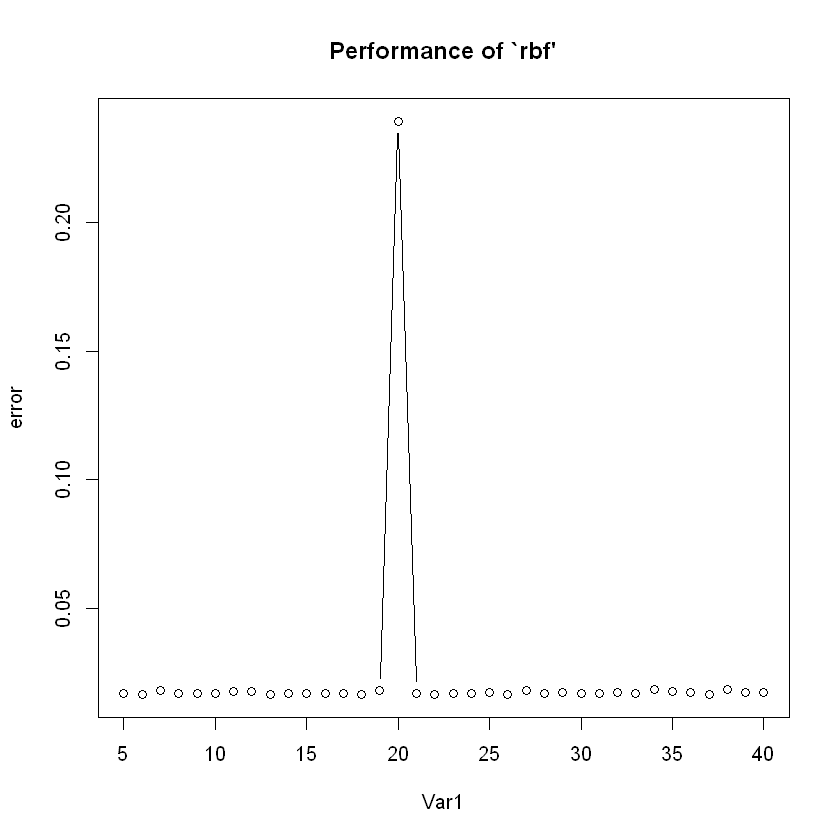

In [45]:
obj <- tune(rbf, train.x = as.matrix(train_data[,input10]), train.y = as.matrix(train_data$target_maxmin),
            ranges = (size = c(5:40))) 
summary(obj)
plot(obj)
obj$best.model
rbf_best <- rbf(as.matrix(train_data[,input10]), as.matrix(train_data$target_maxmin),
            size = 5,maxit=4000)
# save(rbf_best,file='C:/Users/zzy/Desktop/code for barry/final/rbf_best.rda')

In [42]:
load('rbf_best.rda')
rbf_best_prediction <- de_mn(predict(rbf_best, test_data[,input10]))
rbf_best_profit <- sum(pmin(rbf_best_prediction,test_data$target)*3 - rbf_best_prediction*2) 
mse_rbf = mse(rbf_best_prediction, test_data$target) 
cat('Mse using RBF model is', mse_rbf, '\n')
cat('Profits using RBF model is', rbf_best_profit)

Mse using RBF model is 2269104 
Profits using RBF model is 1506589

## 3.2 Summary
### 3.2.1 Name
RBF
### 3.2.2 Input variables
"atemp","season_1","season_2","season_3","season_4","weathersit_1","weathersit_2","weathersit_3","cnt_maxmin","week_moving_avg_maxmin"
### 3.2.3 Output variables
cnt
### 3.2.4 Steps for tuning the model
1 select input variables based on maximaze the profit of validation.

2 using 'tune' function, choose the best number of nodes in the second layer, and the best number is 5.

### 3.2.5 Result
#Mse using RBF model is 2269104.
#Profits using RBF model is 1506589.

# 4 SVM

## 4.1 tune model

In [46]:
set.seed(1)
sub<-sample(1:nrow(train_data),round(nrow(train_data)*2/3))
length(sub)
data_train<-train_data[sub,]
data_val<-train_data[-sub,]

[1] 239

### 4.1.1 select input variables

#--------variable selection for linear kernel-----

In [51]:
svm1<-svm(target~cnt+season+
            mnth+holiday+weekday+
            weathersit+temp+atemp+
            hum+windspeed+week_moving_avg+
            avg_growth_rate+rising_indicator,data=data_train,scale=T,kernel='linear',type='eps-regression')
summary(svm1)
svm1_prediction =as.integer(predict(svm1, data_val))
svm1_profit <- sum(pmin(svm1_prediction,data_val$target)*3 - svm1_prediction*2) 


#delete temp
svm2<-svm(target~cnt+season+
            mnth+holiday+weekday+
            weathersit+atemp+
            hum+windspeed+week_moving_avg+
            avg_growth_rate+rising_indicator,data=data_train,scale=T,kernel='linear',type='eps-regression')
summary(svm2)
svm2_prediction =as.integer(predict(svm2, data_val))
svm2_profit <- sum(pmin(svm2_prediction,data_val$target)*3 - svm2_prediction*2) 

#delete avg_growth_rate
svm3<-svm(target~cnt+season+
            mnth+holiday+weekday+
            weathersit+atemp+
            hum+windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='linear',type='eps-regression')
summary(svm3)
svm3_prediction =as.integer(predict(svm3, data_val))
svm3_profit <- sum(pmin(svm3_prediction,data_val$target)*3 - svm3_prediction*2) 

 #delete season
svm4<-svm(target~cnt+
            mnth+holiday+weekday+
            weathersit+atemp+
            hum+windspeed+week_moving_avg+
            rising_indicator,data=data_train,kernel='linear',scale=T,type='eps-regression')
summary(svm4)
svm4_prediction =as.integer(predict(svm4, data_val))
svm4_profit <- sum(pmin(svm4_prediction,data_val$target)*3 - svm4_prediction*2)

#delete atemp
svm5<-svm(target~cnt+
            mnth+holiday+weekday+
            weathersit+
            hum+windspeed+week_moving_avg+
            rising_indicator,data=data_train,kernel='linear',scale=T,type='eps-regression')
summary(svm5)
svm5_prediction =as.integer(predict(svm5, data_val))
svm5_profit <- sum(pmin(svm5_prediction,data_val$target)*3 - svm5_prediction*2)

#delete cnt
svm6<-svm(target~
            mnth+holiday+weekday+
            weathersit+
            hum+windspeed+week_moving_avg+
            rising_indicator,data=data_train,kernel='linear',scale=T,type='eps-regression')
summary(svm6)
svm6_prediction =as.integer(predict(svm6, data_val))
svm6_profit <- sum(pmin(svm6_prediction,data_val$target)*3 - svm6_prediction*2)

#delete hum
svm7<-svm(target~
            mnth+holiday+weekday+
            weathersit+
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,kernel='linear',scale=T,type='eps-regression')
summary(svm7)
svm7_prediction =as.integer(predict(svm7, data_val))
svm7_profit <- sum(pmin(svm7_prediction,data_val$target)*3 - svm7_prediction*2)


#delete hum
svm8<-svm(target~
            mnth+holiday+weekday+
            weathersit+
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,kernel='linear',scale=T,type='eps-regression')
summary(svm8)
svm8_prediction =as.integer(predict(svm8, data_val))
svm8_profit <- sum(pmin(svm8_prediction,data_val$target)*3 - svm8_prediction*2)




Call:
svm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + temp + atemp + hum + windspeed + week_moving_avg + 
    avg_growth_rate + rising_indicator, data = data_train, kernel = "linear", 
    type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.07692308 
    epsilon:  0.1 


Number of Support Vectors:  200







Call:
svm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + atemp + hum + windspeed + week_moving_avg + avg_growth_rate + 
    rising_indicator, data = data_train, kernel = "linear", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.08333333 
    epsilon:  0.1 


Number of Support Vectors:  196







Call:
svm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + atemp + hum + windspeed + week_moving_avg + rising_indicator, 
    data = data_train, kernel = "linear", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.09090909 
    epsilon:  0.1 


Number of Support Vectors:  196







Call:
svm(formula = target ~ cnt + mnth + holiday + weekday + weathersit + 
    atemp + hum + windspeed + week_moving_avg + rising_indicator, 
    data = data_train, kernel = "linear", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  193







Call:
svm(formula = target ~ cnt + mnth + holiday + weekday + weathersit + 
    hum + windspeed + week_moving_avg + rising_indicator, data = data_train, 
    kernel = "linear", type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1111111 
    epsilon:  0.1 


Number of Support Vectors:  191







Call:
svm(formula = target ~ mnth + holiday + weekday + weathersit + hum + 
    windspeed + week_moving_avg + rising_indicator, data = data_train, 
    kernel = "linear", type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.125 
    epsilon:  0.1 


Number of Support Vectors:  196







Call:
svm(formula = target ~ mnth + holiday + weekday + weathersit + windspeed + 
    week_moving_avg + rising_indicator, data = data_train, kernel = "linear", 
    type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1428571 
    epsilon:  0.1 


Number of Support Vectors:  196







Call:
svm(formula = target ~ mnth + holiday + weekday + weathersit + windspeed + 
    week_moving_avg + rising_indicator, data = data_train, kernel = "linear", 
    type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1428571 
    epsilon:  0.1 


Number of Support Vectors:  196






#--------variable selection for radial kernel-----

In [52]:
svm1<-svm(target~cnt+season+
            mnth+holiday+weekday+
            weathersit+temp+atemp+
            hum+windspeed+week_moving_avg+
            avg_growth_rate+rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm1)
svm1_prediction =as.integer(predict(svm1, data_val))
svm1_profit <- sum(pmin(svm1_prediction,data_val$target)*3 - svm1_prediction*2) 

#delete hum
svm2<-svm(target~cnt+season+
            mnth+holiday+weekday+
            weathersit+atemp+temp+
            windspeed+week_moving_avg+
            avg_growth_rate+rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm2)
svm2_prediction =as.integer(predict(svm2, data_val))
svm2_profit <- sum(pmin(svm2_prediction,data_val$target)*3 - svm2_prediction*2) 

#delete avg_growth_rate
svm3<-svm(target~cnt+season+
            mnth+holiday+weekday+
            weathersit+atemp+temp+
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm3)
svm3_prediction =as.integer(predict(svm3, data_val))
svm3_profit <- sum(pmin(svm3_prediction,data_val$target)*3 - svm3_prediction*2) 

#delete atemp
svm4<-svm(target~cnt+season+
            mnth+holiday+weekday+
            weathersit+temp+
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm4)
svm4_prediction =as.integer(predict(svm4, data_val))
svm4_profit <- sum(pmin(svm4_prediction,data_val$target)*3 - svm4_prediction*2)

#delete cnt
svm5<-svm(target~season+
            mnth+holiday+weekday+
            weathersit+temp+
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm5)
svm5_prediction =as.integer(predict(svm5, data_val))
svm5_profit <- sum(pmin(svm5_prediction,data_val$target)*3 - svm5_prediction*2)

#delete temp
svm6<-svm(target~season+
            mnth+holiday+weekday+
            weathersit+
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm6)
svm6_prediction =as.integer(predict(svm6, data_val))
svm6_profit <- sum(pmin(svm6_prediction,data_val$target)*3 - svm6_prediction*2)

#delete weathersit
svm7<-svm(target~season+
            mnth+holiday+weekday+
            
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm7)
svm7_prediction =as.integer(predict(svm7, data_val))
svm7_profit <- sum(pmin(svm7_prediction,data_val$target)*3 - svm7_prediction*2)

#delete season
svm8<-svm(target~
            mnth+holiday+weekday+
            
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm8)
svm8_prediction =as.integer(predict(svm8, data_val))
svm8_profit <- sum(pmin(svm8_prediction,data_val$target)*3 - svm8_prediction*2)

#delete holiday
svm9<-svm(target~
            mnth+weekday+
            
            windspeed+week_moving_avg+
            rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm9)
svm9_prediction =as.integer(predict(svm9, data_val))
svm9_profit <- sum(pmin(svm9_prediction,data_val$target)*3 - svm9_prediction*2)

#delete weekday
svm10<-svm(target~
             mnth+
             
             windspeed+week_moving_avg+
             rising_indicator,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm10)
svm10_prediction =as.integer(predict(svm10, data_val))
svm10_profit <- sum(pmin(svm10_prediction,data_val$target)*3 - svm10_prediction*2)

#delete weekday
svm11<-svm(target~
             mnth+
             
             windspeed+week_moving_avg,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm11)
svm11_prediction =as.integer(predict(svm11, data_val))
svm11_profit <- sum(pmin(svm11_prediction,data_val$target)*3 - svm11_prediction*2)


#delete weekday
svm12<-svm(target~
             mnth+
             
             week_moving_avg,data=data_train,scale=T,kernel='radial',type='eps-regression')
summary(svm11)
svm12_prediction =as.integer(predict(svm12, data_val))
svm12_profit <- sum(pmin(svm12_prediction,data_val$target)*3 - svm12_prediction*2)


Call:
svm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + temp + atemp + hum + windspeed + week_moving_avg + 
    avg_growth_rate + rising_indicator, data = data_train, kernel = "radial", 
    type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.07692308 
    epsilon:  0.1 


Number of Support Vectors:  193







Call:
svm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + atemp + temp + windspeed + week_moving_avg + avg_growth_rate + 
    rising_indicator, data = data_train, kernel = "radial", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.08333333 
    epsilon:  0.1 


Number of Support Vectors:  192







Call:
svm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + atemp + temp + windspeed + week_moving_avg + rising_indicator, 
    data = data_train, kernel = "radial", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.09090909 
    epsilon:  0.1 


Number of Support Vectors:  197







Call:
svm(formula = target ~ cnt + season + mnth + holiday + weekday + 
    weathersit + temp + windspeed + week_moving_avg + rising_indicator, 
    data = data_train, kernel = "radial", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  194







Call:
svm(formula = target ~ season + mnth + holiday + weekday + weathersit + 
    temp + windspeed + week_moving_avg + rising_indicator, data = data_train, 
    kernel = "radial", type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1111111 
    epsilon:  0.1 


Number of Support Vectors:  193







Call:
svm(formula = target ~ season + mnth + holiday + weekday + weathersit + 
    windspeed + week_moving_avg + rising_indicator, data = data_train, 
    kernel = "radial", type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.125 
    epsilon:  0.1 


Number of Support Vectors:  193







Call:
svm(formula = target ~ season + mnth + holiday + weekday + windspeed + 
    week_moving_avg + rising_indicator, data = data_train, kernel = "radial", 
    type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1428571 
    epsilon:  0.1 


Number of Support Vectors:  191







Call:
svm(formula = target ~ mnth + holiday + weekday + windspeed + week_moving_avg + 
    rising_indicator, data = data_train, kernel = "radial", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1666667 
    epsilon:  0.1 


Number of Support Vectors:  189







Call:
svm(formula = target ~ mnth + weekday + windspeed + week_moving_avg + 
    rising_indicator, data = data_train, kernel = "radial", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.2 
    epsilon:  0.1 


Number of Support Vectors:  193







Call:
svm(formula = target ~ mnth + windspeed + week_moving_avg + rising_indicator, 
    data = data_train, kernel = "radial", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 
    epsilon:  0.1 


Number of Support Vectors:  192







Call:
svm(formula = target ~ mnth + windspeed + week_moving_avg, data = data_train, 
    kernel = "radial", type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.3333333 
    epsilon:  0.1 


Number of Support Vectors:  189







Call:
svm(formula = target ~ mnth + windspeed + week_moving_avg, data = data_train, 
    kernel = "radial", type = "eps-regression", scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.3333333 
    epsilon:  0.1 


Number of Support Vectors:  189






### 4.1.2 tune parameter


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 0.001   25

- best performance: 581893.1 



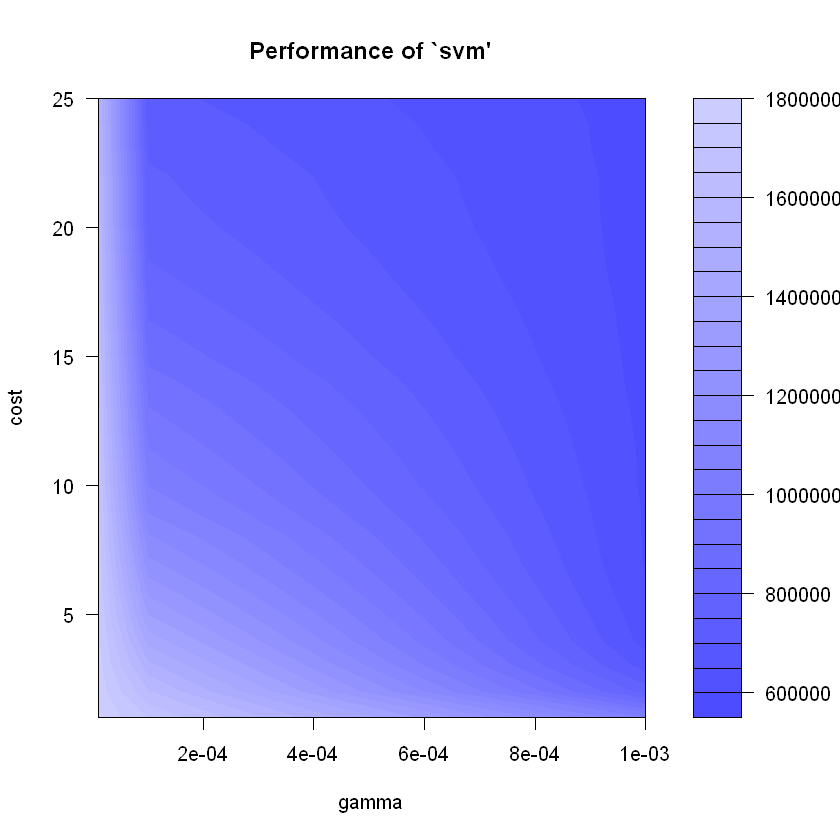

In [53]:
# because radial is better than linear, we decide to use radial for tuning...
OptModelsvm_radial=tune.svm(target~mnth+week_moving_avg,data=data_train,gamma=c(0.001,0.0001,0.00001),scale=T,cost=(1:25),kernel='radial',type='eps-regression')
#Print optimum value of parameters
print(OptModelsvm_radial)
#Plot the perfrormance of SVM Regression model
plot(OptModelsvm_radial)
#Find out the best model
BstModel_radial=OptModelsvm_radial$best.model
#Predict Y using best model
PredYBst_radial=predict(BstModel_radial,data_val)
svmBst_profit_radial <- sum(pmin(PredYBst_radial,data_val$target)*3 - PredYBst_radial*2) 

In [54]:
#best prediction
svm_best<-svm(target~mnth+week_moving_avg,
          data=train_data,scale=T,
          cost=16, gamma=0.001,kernel='radial',type='eps-regression')
summary(svm_best)
svm_best_prediction =as.integer(predict(svm_best, test_data))
svm_best_profit <- sum(pmin(svm_best_prediction,test_data$target)*3 - svm_best_prediction*2) 


Call:
svm(formula = target ~ mnth + week_moving_avg, data = train_data, 
    cost = 16, gamma = 0.001, kernel = "radial", type = "eps-regression", 
    scale = T)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  16 
      gamma:  0.001 
    epsilon:  0.1 


Number of Support Vectors:  295






In [55]:
mse_svm = mse(rbf_best_prediction, test_data$target) 
cat('Mse using RBF model is', mse_svm, '\n')
cat('Profits using RBF model is', svm_best_profit)

Mse using RBF model is 2269104 
Profits using RBF model is 1560985

## 4.2 Summary
### 4.2.1 Name
SVM
### 4.2.2 Input variables
mnth, week_moving_avg
### 4.2.3 Output variables
cnt
### 4.2.4 Steps for tuning the model
1 select variables in both linear SVM and Kernel SVM to maximize the validationn profits

2 Compare linear SVM and Kernel SVM, find Kernel SVM has the best result, so use Kernel SVM

3 tune parameters and find the best parameters: gamma = 0.001,  cost = 25
### 4.2.5 Result
#Mse using RBF model is 2269104. 
#Profits using RBF model is 1560985.